In [32]:
import numpy as np
import matplotlib.pyplot as plt

import random
import math

In [73]:

# Generating random points for the Question

p=np.random.rand(1,2)
p_x=p[0,0]*10
p_y=p[0,1]*10



X=np.random.rand(1,2)
x_1=X[0,0]*10
x_2=X[0,1]*10



Y=np.random.rand(1,2)
y_1=Y[0,0]*10
y_2=Y[0,1]*10

while x_1 == x_2 and y_1==y_2: # Incase P0=P1, keep regenerating until we get different points
    X=np.random.rand(1,2)
    x_1=X[0,0]*10
    x_2=X[0,1]*10
    Y=np.random.rand(1,2)
    y_1=Y[0,0]*10
    y_2=Y[0,1]*10

check_slope = 0 

if (x_2-x_1)==0: # Checking if it is a vertical line which would make the slope infinity
    check_slope = 1
    
    
if check_slope ==0:
    
    # Calculating the equation of the line.
    
    slope = (y_2-y_1)/(x_2-x_1)

    a = slope
    b=-1
    c = (-slope*x_1 + y_1)

    c_foot = p_y - (-1/slope) * p_x

    foot_y = p_y - (1/slope)
    foot_x = p_x + 1

    # Calculating the Distance from the point to the line

    distance = abs(a*p_x + b*p_y +c)/math.sqrt(a**2 + b**2)
    
    
    A = np.array([[slope,-1],[(-1/slope),-1]])
    print(A.dtype)
    B = np.array([-c,-c_foot])
    x_soln = np.linalg.solve(A, B)
    print(x_soln)
else:
    slope = np.inf
    
    # Incase of the vertical line, the distance is the difference between the X coordinates.
    
    distance = abs(x_1-p_x)
    
print("P0 = (%f,%f), P1=(%f,%f), P = (%f,%f)"%(x_1,y_1,x_2,y_2,p_x,p_y))
print("The orthogonal distance from P to the line containing P0 and P1 is: %f"%(distance))
print("The slope of the line containing P0 and P1 is: %f"%(slope))

float64
[4.90505157 7.32925355]
P0 = (6.907533,3.428436), P1=(7.611798,2.056534), P = (7.092607,8.452233)
The orthogonal distance from P to the line containing P0 and P1 is: 2.458959
The slope of the line containing P0 and P1 is: -1.947992


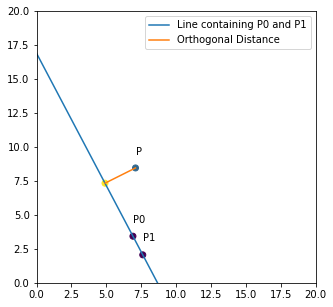

In [74]:
# Plotting the points and and the lines

fig = plt.subplots(figsize=(5,5))
ax = plt.axes()

x_coordinates = [x_1, x_2,p_x,x_soln[0]]
y_coordinates = [y_1,y_2,p_y,x_soln[1]]

plt.annotate("P0", (x_1,y_1+1))
plt.annotate("P1", (x_2,y_2+1))
plt.annotate("P", (p_x,p_y+1))
plt.scatter(x_coordinates, y_coordinates,c=[1,1,2,4])

if check_slope==0:
    x = np.linspace(0, 20, 1000)
    ax.plot(x,((slope*x)+c),label='Line containing P0 and P1')
#     ax.plot([foot_x,p_x + 32,p_x - 32],[foot_y,p_y - (32/slope),p_y + (32/slope)],label='Orthogonal Distance')
#     ax.plot([p_x,xi],[p_y,yi],label='Orthogonal Distance')
    ax.plot([p_x,x_soln[0]],[p_y,x_soln[1]],label='Orthogonal Distance')
    plt.xlim(0, 20)
    plt.ylim(0, 20)
else:
    plt.vlines(x_1,0,40,label='Line containing P0 and P1')
    plt.hlines(p_y,0,40,label='Orthogonal Distance')

leg = ax.legend()